# Heart Failure Prediction 

## Machine learning (GOMYCODE) project

### Introduction

This project goes through the machine learning workflow of predicting possible heart diseases from the dataset "Heart Failure Prediction Dataset". This project is a supervised (thanks mr hashem) machine learning model as it already has an output target,
The download link for this dataset will be provided in the github folder.

## 1. Problem identification

Using this dataset, we are going to create a model that predicts an outcome of weather the individual might get a heart disease or not based on the 11 features provided.

## 2. Choosing an appropriate Data

The dataset that I chose is the "Heart Failure Prediction Dataset" from kaggle. The source of this dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. 

## 3. Data preparation

### Describe your data

In [1]:
import pandas as pd
df = pd.read_csv('heart.csv')

In [2]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

We can see that there are 918 rows and 12 columns with no nulls. We can also see that the dataframe contains categorical and numerical values by the information provided in kaggle.


| Attribute | Description |
| --- | --- |
| Age | age of the patient [years] |
| Sex | sex of the patient [M: Male, F: Female] |
| ChestPainType | chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] |
| RestingBP | resting blood pressure [mm Hg] |
| Cholesterol | serum cholesterol [mm/dl] |
| FastingBS | fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] |
| RestingECG | resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] |
| MaxHR | maximum heart rate achieved [Numeric value between 60 and 202] |
| ExerciseAngina | exercise-induced angina [Y: Yes, N: No] |
| Oldpeak |  oldpeak = ST [Numeric value measured in depression] |
| ST_Slope | the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] |
| HeartDisease |  output class [1: heart disease, 0: Normal] |

(Attribute description taken from kaggle)

### Preprocess your data

In [5]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Since machines only work with numbers, lets replace some of the categories with numbers that machines can comprehend

In [6]:
''' 
Lets create a dictionary for sex to replace male with 0 and female with 1. 
Note that this won't be in the actual df, it'll be in a copy
'''
sex_dict = { 
    'M' : 0,
    'F' : 1    
}

In [7]:
# Create a copy for the new df
new_df = df.copy()

In [8]:
# Replacing male and female with 0 and 1 in our new dataframe
new_df['Sex'] = new_df['Sex'].apply(lambda x: sex_dict[x])

In [9]:
# Lets make sure it worked
new_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,0,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,0,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,1,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [10]:
''' 
Lets create a dictionary for ExerciseAngina to replace N with 0 and y with 1. 
Note that this won't be in the actual df, it'll be in a copy
'''
ExerciseAngina_dict = { 
    'N' : 0,
    'Y' : 1    
}

In [11]:
# Replacing N and Y with 0 and 1 in our new dataframe
new_df['ExerciseAngina'] = new_df['ExerciseAngina'].apply(lambda x: ExerciseAngina_dict[x])

In [12]:
# Lets make sure it worked
new_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,0,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,0,ASY,130,131,0,Normal,115,1,1.2,Flat,1
916,57,1,ATA,130,236,0,LVH,174,0,0.0,Flat,1


In [13]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [14]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [15]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [16]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [17]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

Now that we are done with preprocessing the data (No Nan values, values are in numbers so the machines can read them), we can coninue to our next phase.

## 4. Data Visualization

In [18]:
# Getting all of the important features that can have a relationship towards the heart Failure
df_features = df[['Age', 'Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']].copy()

In [19]:
# Importing the library that creates the graphs reqiured for data visualization
import matplotlib.pyplot as plt

In [20]:
# Importing sns to use .faceitgrid
import seaborn as sns

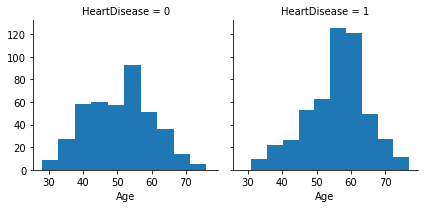

In [23]:
# Studying the distribution between Heart disease and age
g = sns.FacetGrid(df[['HeartDisease', 'Age']], col = 'HeartDisease')
g.map(plt.hist, 'Age')
plt.show()

We noticed here that the children were the most likely to not get heart failure. Indicating that the column HeartDisease is influenced by individuals age. So, age must be kept as a feature.

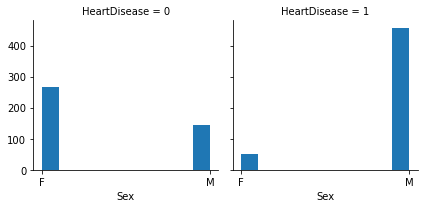

In [25]:
# Studying the distribution between Heart Disease and Sex
g = sns.FacetGrid(df[['HeartDisease', 'Sex']], col = 'HeartDisease')
g.map(plt.hist, 'Sex')
plt.show()

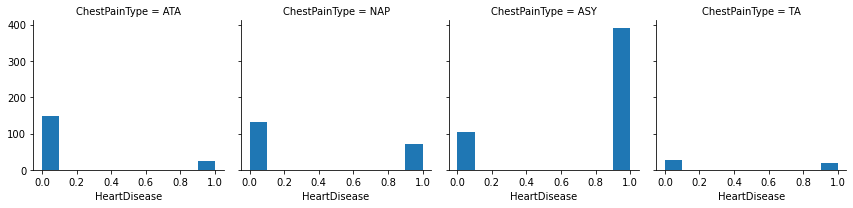

In [27]:
g = sns.FacetGrid(df, col = 'ChestPainType')
g.map(plt.hist,'HeartDisease')
plt.show()

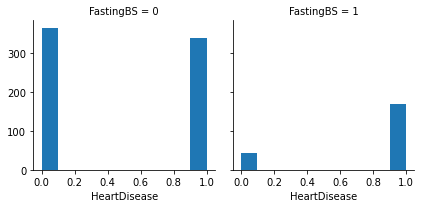

In [28]:
g = sns.FacetGrid(df, col = 'FastingBS')
g.map(plt.hist,'HeartDisease')
plt.show()

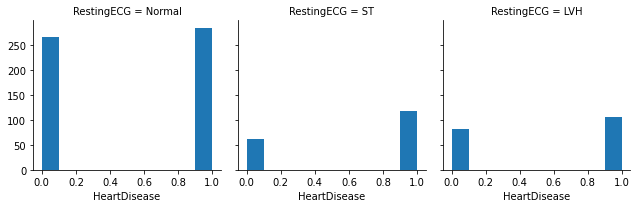

In [29]:
g = sns.FacetGrid(df, col = 'RestingECG')
g.map(plt.hist,'HeartDisease')
plt.show()

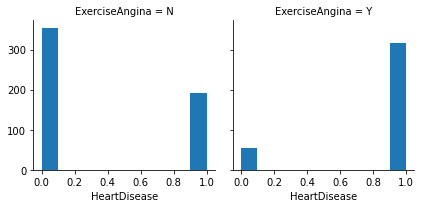

In [30]:
g = sns.FacetGrid(df, col = 'ExerciseAngina')
g.map(plt.hist,'HeartDisease')
plt.show()

## 5. Choosing the right algorithm

Since our dataset is already labelled, we are going to model our machine using supervised machine learning. Supervised machine learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs. It infers a function from labeled training data consisting of a set of training examples.

## 6. Modeling

In [36]:
new_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,0,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,0,ASY,130,131,0,Normal,115,1,1.2,Flat,1
916,57,1,ATA,130,236,0,LVH,174,0,0.0,Flat,1


In [37]:
ChestPainType_dict = { 
    'ASY' : 0,
    'NAP' : 1,
    'ATA' : 2,
    'TA' : 3
}

In [38]:
new_df['ChestPainType'] = new_df['ChestPainType'].apply(lambda x: ChestPainType_dict[x])

In [39]:
RestingECG_dict = { 
    'Normal' : 0,
    'ST' : 1,
    'LVH' : 2
}

In [40]:
new_df['RestingECG'] = new_df['RestingECG'].apply(lambda x: RestingECG_dict[x])

In [44]:
ST_Slope_dict = { 
    'Up' : 0,
    'Flat' : 1,
    'Down' : 2
}

In [45]:
new_df['ST_Slope'] = new_df['ST_Slope'].apply(lambda x: ST_Slope_dict[x])

In [49]:
new_df_features = new_df[['Age', 'Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']].copy()

In [50]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

y = df['HeartDisease']
x = new_df_features

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

# applying tree algorithm
tree_model = tree.DecisionTreeClassifier()  
# fitting our model
tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

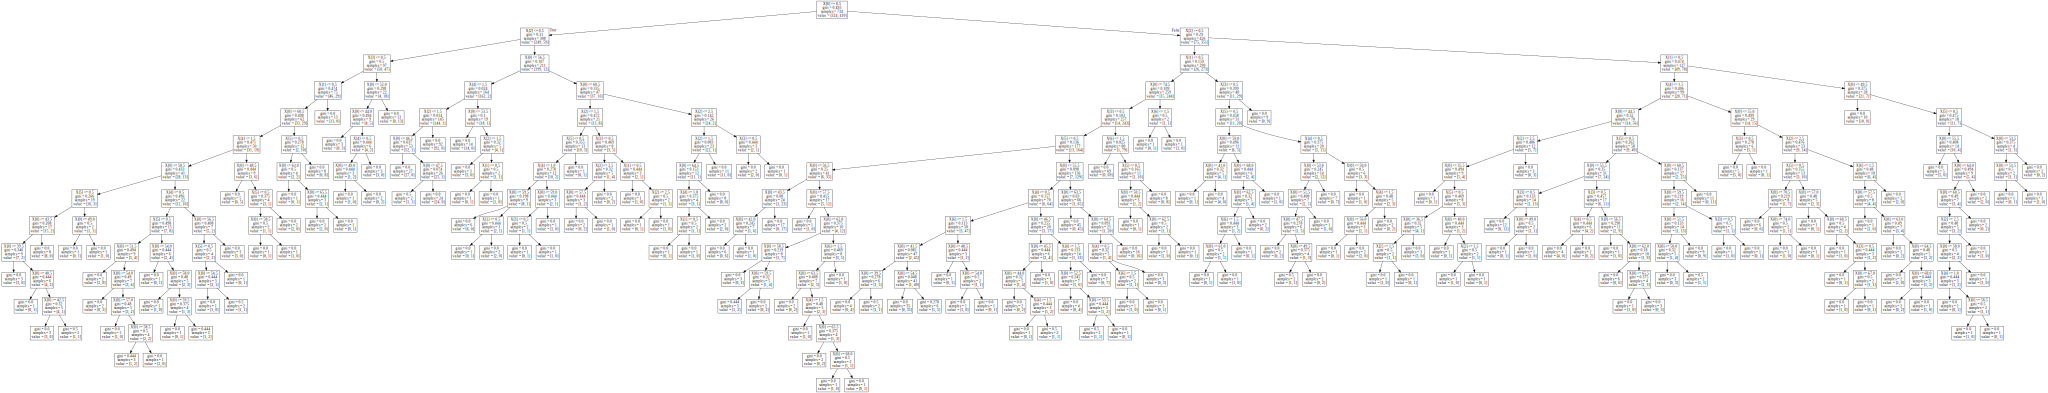

In [56]:
#importing relevant library
import graphviz

dot_data = tree.export_graphviz(tree_model, out_file = None)
graph = graphviz.Source(dot_data)
graph.render("data")
graph

In [57]:
x_test

,Age,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
242,55,0,2,1,0,1,1
441,69,0,0,1,1,0,1
260,46,0,2,0,0,1,0
546,48,0,1,1,1,0,1
847,45,0,0,0,2,0,0
...,...,...,...,...,...,...,...
819,55,0,0,0,2,1,1
140,52,0,0,0,0,1,1
195,62,1,3,0,0,0,0
654,48,0,0,0,2,0,0


In [58]:
y_test

242    1
441    1
260    0
546    1
847    0
      ..
819    1
140    1
195    0
654    0
252    0
Name: HeartDisease, Length: 184, dtype: int64

In [59]:
y_pred=tree_model.predict(x_test) 

print("score:{}".format(accuracy_score(y_test, y_pred)*100))

score:74.45652173913044


We can see that our model is accurate, but needs further upgrades as it has a percentage lower than 75%.

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [61]:
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train) 

RandomForestClassifier(n_estimators=10)

In [62]:
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100) 

Accuracy: 77.17391304347827


We can see that the random forest model is more accurate than our previous model. With an acceptable accuracy of 77%.

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test)*100)

Acuuracy= 75.54347826086956


### Finding optimal K value

In [72]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.72
Accuracy for k= 2 is: 0.75
Accuracy for k= 3 is: 0.74
Accuracy for k= 4 is: 0.74
Accuracy for k= 5 is: 0.74
Accuracy for k= 6 is: 0.74
Accuracy for k= 7 is: 0.74
Accuracy for k= 8 is: 0.74
Accuracy for k= 9 is: 0.75
Accuracy for k= 10 is: 0.76
Accuracy for k= 11 is: 0.76
Accuracy for k= 12 is: 0.74
Accuracy for k= 13 is: 0.78
Accuracy for k= 14 is: 0.78
Accuracy for k= 15 is: 0.78
Accuracy for k= 16 is: 0.79
Accuracy for k= 17 is: 0.8
Accuracy for k= 18 is: 0.8
Accuracy for k= 19 is: 0.79
Accuracy for k= 20 is: 0.81
Accuracy for k= 21 is: 0.8
Accuracy for k= 22 is: 0.81
Accuracy for k= 23 is: 0.82
Accuracy for k= 24 is: 0.8
Accuracy for k= 25 is: 0.77
Accuracy for k= 26 is: 0.8
Accuracy for k= 27 is: 0.78
Accuracy for k= 28 is: 0.73
Accuracy for k= 29 is: 0.75


We have concluded that the optimal value for k is 23 with an accuracy of around 82%

In [74]:
from sklearn.linear_model import LogisticRegression 

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

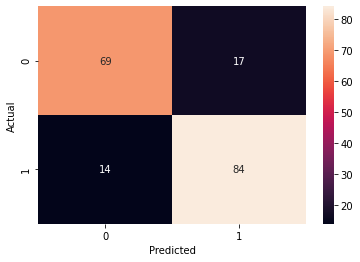

In [75]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

## 7. Experimentation before project execution

To conclude this, our model managed to predit who had a heart disease based on the given features which were Age, Sex, ChestPainType, FastingBS, RestingECG, ExerciseAngina, and ST_Slope. We have created and tested a model that got a high percentage when predicting our target with a percentage higher than 75% which further proves the accuracy of the model. We have also applied logistic regression and converted it into a confusion matrix which identified that our new model taht had an 83% accuracy was the best model created so far that predicts the heart diseases using the features. To further improve our model in the future, we can try for some more types of regressions for example polynomial, or linear, or multi-linear regressions that we can also test their accuracy in order to identify which regression would provide us with the best results and best model possible. However, we have to make sure that the given dataframe that I chose contained strings, which is why I had to create a new dataframe with strings convereted into integers in order to be able to split and test the data.